In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as plt
%matplotlib inline

### import and data preparation

In [4]:
order = pd.read_csv(r"C:\Users\admar\Documents\retailOrdersProject\orders.csv")

In [5]:
order.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [6]:
order.isnull()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [8]:
order['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

#### changing ['Not Available', 'unknown'] to NaN

In [10]:
isNotAvaliable = order['Ship Mode'] == 'Not Available'

In [11]:
order.loc[isNotAvaliable,'Ship Mode'] = np.nan

In [12]:
isUnknown = order['Ship Mode'] == 'unknown'

In [13]:
order.loc[isUnknown,'Ship Mode'] = np.nan

In [14]:
order['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

#### changing the names columns

In [16]:
order.columns = order.columns.str.lower()

In [17]:
order.columns = order.columns.str.replace(' ','_')

In [18]:
order.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


#### count of discount, sale price and profit

In [20]:
order['discount'] = order['list_price']*order['discount_percent']*0.01

In [21]:
order.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0


In [22]:
order['sale_price'] = order['list_price'] - order['discount']

In [23]:
order.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0


In [24]:
order['profit'] = order['sale_price'] - order['cost_price']

In [25]:
order.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [26]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          9994 non-null   int64  
 1   order_date        9994 non-null   object 
 2   ship_mode         9988 non-null   object 
 3   segment           9994 non-null   object 
 4   country           9994 non-null   object 
 5   city              9994 non-null   object 
 6   state             9994 non-null   object 
 7   postal_code       9994 non-null   int64  
 8   region            9994 non-null   object 
 9   category          9994 non-null   object 
 10  sub_category      9994 non-null   object 
 11  product_id        9994 non-null   object 
 12  cost_price        9994 non-null   int64  
 13  list_price        9994 non-null   int64  
 14  quantity          9994 non-null   int64  
 15  discount_percent  9994 non-null   int64  
 16  discount          9994 non-null   float64


In [27]:
#convert order_date to datetime

In [28]:
order['order_date'] = pd.to_datetime(order['order_date'],format='%Y-%m-%d')

In [29]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          9994 non-null   int64         
 1   order_date        9994 non-null   datetime64[ns]
 2   ship_mode         9988 non-null   object        
 3   segment           9994 non-null   object        
 4   country           9994 non-null   object        
 5   city              9994 non-null   object        
 6   state             9994 non-null   object        
 7   postal_code       9994 non-null   int64         
 8   region            9994 non-null   object        
 9   category          9994 non-null   object        
 10  sub_category      9994 non-null   object        
 11  product_id        9994 non-null   object        
 12  cost_price        9994 non-null   int64         
 13  list_price        9994 non-null   int64         
 14  quantity          9994 n

In [30]:
order.drop(columns=['discount_percent','list_price','cost_price'],inplace=True)

In [31]:
order.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [32]:
order['year'] = order['order_date'].dt.year

In [33]:
order.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,2023
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,2023
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,2022
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,2022


In [34]:
order.isnull().sum()

order_id        0
order_date      0
ship_mode       6
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub_category    0
product_id      0
quantity        0
discount        0
sale_price      0
profit          0
year            0
dtype: int64

In [35]:
order.describe()

,order_id,order_date,postal_code,quantity,discount,sale_price,profit,year
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-12-29 10:20:34.820892672,55190.379428,3.789574,8.037953,221.718901,20.529188,2022.495998
min,1.000000,2022-01-01 00:00:00,1040.000000,1.000000,0.000000,0.000000,-5.000000,2022.000000
25%,2499.250000,2022-06-29 00:00:00,23223.000000,2.000000,0.600000,19.200000,-0.400000,2022.000000
50%,4997.500000,2022-12-28 00:00:00,56430.500000,3.000000,1.800000,49.000000,6.000000,2022.000000
75%,7495.750000,2023-07-03 00:00:00,90008.000000,5.000000,7.000000,201.600000,16.700000,2023.000000
max,9994.000000,2023-12-31 00:00:00,99301.000000,14.000000,905.600000,21734.400000,3624.400000,2023.000000
std,2885.163629,NaN,32063.693350,2.225110,22.978004,601.399604,72.514547,0.500009


#### data type optymalization

In [37]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   int64         
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   object        
 3   segment       9994 non-null   object        
 4   country       9994 non-null   object        
 5   city          9994 non-null   object        
 6   state         9994 non-null   object        
 7   postal_code   9994 non-null   int64         
 8   region        9994 non-null   object        
 9   category      9994 non-null   object        
 10  sub_category  9994 non-null   object        
 11  product_id    9994 non-null   object        
 12  quantity      9994 non-null   int64         
 13  discount      9994 non-null   float64       
 14  sale_price    9994 non-null   float64       
 15  profit        9994 non-null   float64 

In [38]:
order['ship_mode'].value_counts()

ship_mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [39]:
order['ship_mode'] = order['ship_mode'].astype('category')

In [40]:
order['segment'].value_counts()

segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [41]:
order['segment'] = order['segment'].astype('category')

In [42]:
order['country'].value_counts()

country
United States    9994
Name: count, dtype: int64

In [43]:
order['country'] = order['country'].astype('category')

In [44]:
order['city'].value_counts()

city
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [45]:
order['city'] = order['city'].astype('category')

In [46]:
order['state'] = order['state'].astype('category')

In [47]:
order['postal_code'].value_counts()

postal_code
10035    263
10024    230
10009    229
94122    203
10011    193
        ... 
27534      1
53186      1
32503      1
94509      1
63376      1
Name: count, Length: 631, dtype: int64

In [48]:
order['postal_code'] = order['postal_code'].astype('category')

In [49]:
order['region'].value_counts()

region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [50]:
order['region'] = order['region'].astype('category')

In [51]:
order['category'].value_counts()

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [52]:
order['category'] = order['category'].astype('category')

In [53]:
order['sub_category'].value_counts()

sub_category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [54]:
order['sub_category'] = order['sub_category'].astype('category')

In [55]:
order['product_id'].value_counts()

product_id
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10001146    15
TEC-AC-10003628    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: count, Length: 1862, dtype: int64

In [56]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   int64         
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   category      
 3   segment       9994 non-null   category      
 4   country       9994 non-null   category      
 5   city          9994 non-null   category      
 6   state         9994 non-null   category      
 7   postal_code   9994 non-null   category      
 8   region        9994 non-null   category      
 9   category      9994 non-null   category      
 10  sub_category  9994 non-null   category      
 11  product_id    9994 non-null   object        
 12  quantity      9994 non-null   int64         
 13  discount      9994 non-null   float64       
 14  sale_price    9994 non-null   float64       
 15  profit        9994 non-null   float64 

#### summary sale_price and profit

In [58]:
order['sale_price'].sum()
order['profit'].sum()
print('The total sales amount to: %d ' % (order['sale_price'].sum()) )
print('The total profit amount to: %d ' % (order['profit'].sum()) )

The total sales amount to: 2215858 
The total profit amount to: 205168 


#### sales by regions and categories

In [60]:
ptRegCat = order.pivot_table(values=['sale_price','profit'],index='region',columns='category',aggfunc='sum')

C:\Users\admar\AppData\Local\Temp\ipykernel_15088\150113809.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ptRegCat = order.pivot_table(values=['sale_price','profit'],index='region',columns='category',aggfunc='sum')


In [61]:
ptRegCatsw = ptRegCat.swaplevel(axis='columns')

In [62]:
ptRegCatsw

category,Furniture,Office Supplies,Technology,Furniture,Office Supplies,Technology
,profit,profit,profit,sale_price,sale_price,sale_price
region,,,,,,
Central,15998.5,14507.5,15872.6,158038.5,161077.5,164552.6
East,17549.6,16788.6,23881.8,200589.6,198148.6,255581.8
South,11071.2,12233.9,14706.4,113141.2,121263.9,143606.4
West,21861.4,18724.5,21972.7,243571.4,213154.5,243132.7


In [63]:
ptRegCatsw.columns

MultiIndex([(      'Furniture',     'profit'),
            ('Office Supplies',     'profit'),
            (     'Technology',     'profit'),
            (      'Furniture', 'sale_price'),
            ('Office Supplies', 'sale_price'),
            (     'Technology', 'sale_price')],
           names=['category', None])

<Axes: title={'center': 'Profit per region'}, xlabel='region'>

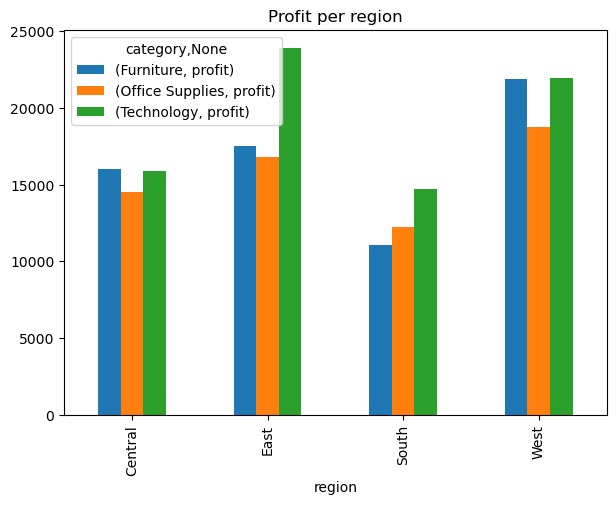

In [64]:
ptRegCatsw[[(      'Furniture',     'profit'),
            ('Office Supplies',     'profit'),
            (     'Technology',     'profit')]].plot(kind='bar',figsize=(7,5),title='Profit per region')

<Axes: title={'center': 'Sale price per region'}, xlabel='region'>

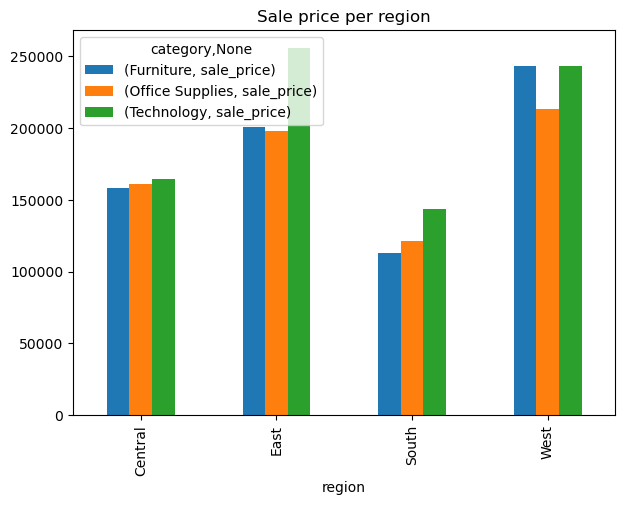

In [65]:
ptRegCatsw[[('Furniture', 'sale_price'),
            ('Office Supplies', 'sale_price'),
            (     'Technology', 'sale_price')]].plot(kind='bar',figsize=(7,5),title='Sale price per region')

#### average sales per order

In [67]:
order['sale_price'].mean()

221.7189013408045

In [68]:
print('The average order price is %f' %(order['sale_price'].mean()))

The average order price is 221.718901


#### how daes a discount affect profit ?

In [70]:
orderAbove = order[order['discount'] > 10]

<Axes: title={'center': 'The impact of a discount on profit'}, xlabel='discount', ylabel='profit'>

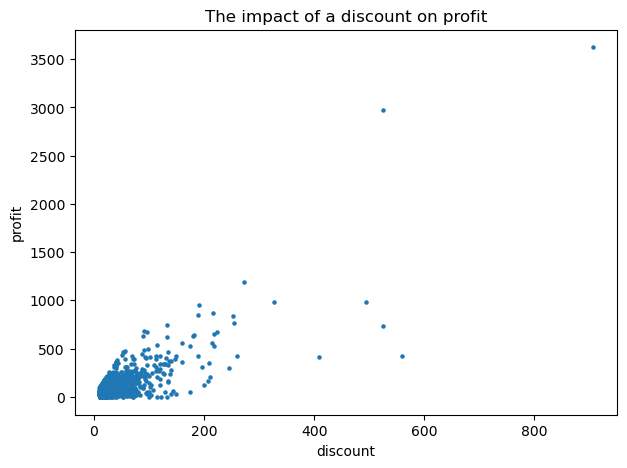

In [71]:
orderAbove.plot(kind='scatter',y='profit',x='discount',s=5,figsize=(7,5),title='The impact of a discount on profit')

#### Customer segment analysis

In [73]:
order['segment'].unique()

['Consumer', 'Corporate', 'Home Office']
Categories (3, object): ['Consumer', 'Corporate', 'Home Office']

In [74]:
CustSeg = order.pivot_table(index='segment',values=['profit','sale_price'],aggfunc='sum')

C:\Users\admar\AppData\Local\Temp\ipykernel_15088\1051397184.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  CustSeg = order.pivot_table(index='segment',values=['profit','sale_price'],aggfunc='sum')


In [75]:
CustSeg

,profit,sale_price
segment,,
Consumer,101586.0,1119696.0
Corporate,65637.7,681657.7
Home Office,37945.0,414505.0


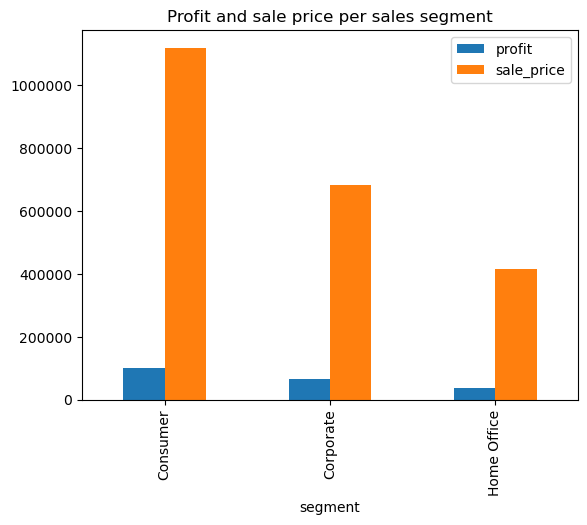

In [76]:
CustSeg.plot(kind='bar',title='Profit and sale price per sales segment').ticklabel_format(style='plain',axis='y')

### average order value per segments

In [78]:
avgOrderBySeg = order.pivot_table(index='segment',values=['sale_price'],aggfunc='mean')

C:\Users\admar\AppData\Local\Temp\ipykernel_15088\2586486282.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avgOrderBySeg = order.pivot_table(index='segment',values=['sale_price'],aggfunc='mean')


In [79]:
avgOrderBySeg

,sale_price
segment,
Consumer,215.699480
Corporate,225.714470
Home Office,232.476164


<Axes: title={'center': 'average sale price'}, xlabel='segment'>

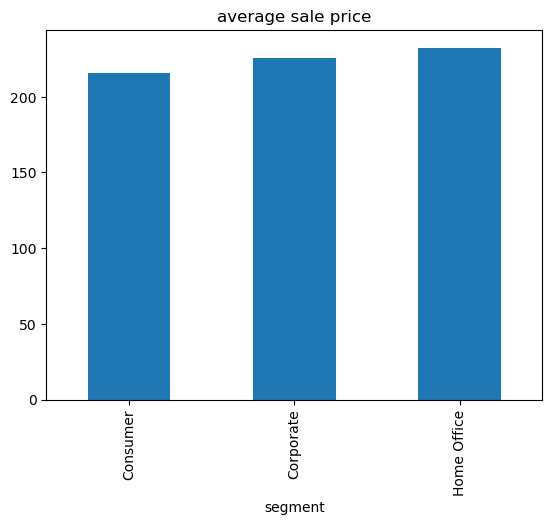

In [80]:
avgOrderBySeg.plot(kind='bar',title='average sale price',legend=False)

### sales in time

In [115]:
orderCopy = order.copy()

In [117]:
orderCopy.groupby(order['year'])['sale_price'].sum().sum()
print('The total sales in 2022 and 2023 amounted to %f' % (order.groupby(order['year'])['sale_price'].sum().sum()))

The total sales in 2022 and 2023 amounted to 2215858.700000


In [119]:
orderCopy['total_sum_percent'] = orderCopy.groupby(order['year'])['sale_price'].sum() / orderCopy.groupby(order['year'])['sale_price'].sum().sum()

In [147]:
salesInTime = orderCopy.groupby(order['year'])['sale_price'].sum().to_frame()

array([<Axes: ylabel='sale_price'>], dtype=object)

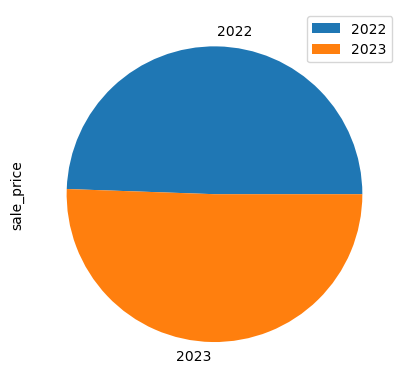

In [151]:
salesInTime.plot(kind='pie',subplots=True)

#### sales by month

In [ ]:
order['month'] = order['order_date'].dt.month

In [ ]:
groupsSalesSeason = order.groupby(['month','category'])['sale_price'].sum().to_frame()

In [ ]:
groupsSalesSeason.head()

In [ ]:
groupsSalesSeason2 = groupsSalesSeason.unstack()

In [ ]:
groupsSalesSeason2.plot(kind='bar',title='sales by month')

#### top 10 bestselling products

In [ ]:
bestselling = order[['product_id','sale_price']].sort_values(by='sale_price')

In [ ]:
bestsellingFr = bestselling.groupby('product_id')['sale_price'].sum().to_frame()

In [ ]:
bestsellingFr.sort_values(by='sale_price',ascending=False).head(10)

#### product that were not sold

In [ ]:
with pd.option_context('display.max_rows', None):
    print(bestselling.query('sale_price == 0')['product_id'])

In [ ]:
order.columns

#### Margin analysis

In [ ]:
margin = order['profit']/order['sale_price']

In [ ]:
order['margin'] = margin

In [ ]:
order[['product_id','margin']].sort_values(by='margin',ascending=False).dropna()

In [ ]:
order['margin'].plot(kind='box',title='Distribution of product margins')

#### products with the highest margin (4th quartile)

In [ ]:
order['margin'].quantile(0.75)

In [ ]:
kwantyl = order['margin'] >= order['margin'].quantile(0.75)

In [ ]:
kwantyl

In [ ]:
with pd.option_context('display.max_rows', None):
    print(order[kwantyl].product_id)

#### products with the lowest margin (4th quartile)

In [ ]:
order['margin'].quantile(0.25)

In [ ]:
firstquantile = order['margin'] < order['margin'].quantile(0.25)

In [ ]:
with pd.option_context('display.max_rows', None):
    print(order[firstquantile].product_id)

#### sales by categorie and subcategories

In [ ]:
order.groupby(['category'])['sale_price'].sum().plot(kind='bar')

In [ ]:
order.groupby(['sub_category'])['sale_price'].sum().sort_values(ascending=False).plot(kind='bar')

#### the impact of the delivery method on profit

In [ ]:
order.groupby(['ship_mode'])['profit'].sum().plot(kind='bar')

#### The analysis of variable correlations

In [90]:
import seaborn as sns

In [96]:
num_col_df = order[['quantity', 'discount', 'sale_price', 'profit', 'year']]

In [98]:
num_col_df.head()

,quantity,discount,sale_price,profit,year
0,2,5.2,254.8,14.8,2023
1,3,21.9,708.1,108.1,2023
2,2,0.5,9.5,-0.5,2023
3,5,19.2,940.8,160.8,2022
4,2,1.0,19.0,-1.0,2022


In [100]:
correlation_matrix = num_col_df.corr()

In [102]:
print(correlation_matrix)

            quantity  discount  sale_price    profit      year
quantity    1.000000  0.198502    0.200574  0.162755  0.001087
discount    0.198502  1.000000    0.948910  0.833228 -0.000894
sale_price  0.200574  0.948910    1.000000  0.891673  0.007058
profit      0.162755  0.833228    0.891673  1.000000  0.004927
year        0.001087 -0.000894    0.007058  0.004927  1.000000


In [106]:
import matplotlib.pyplot as plt

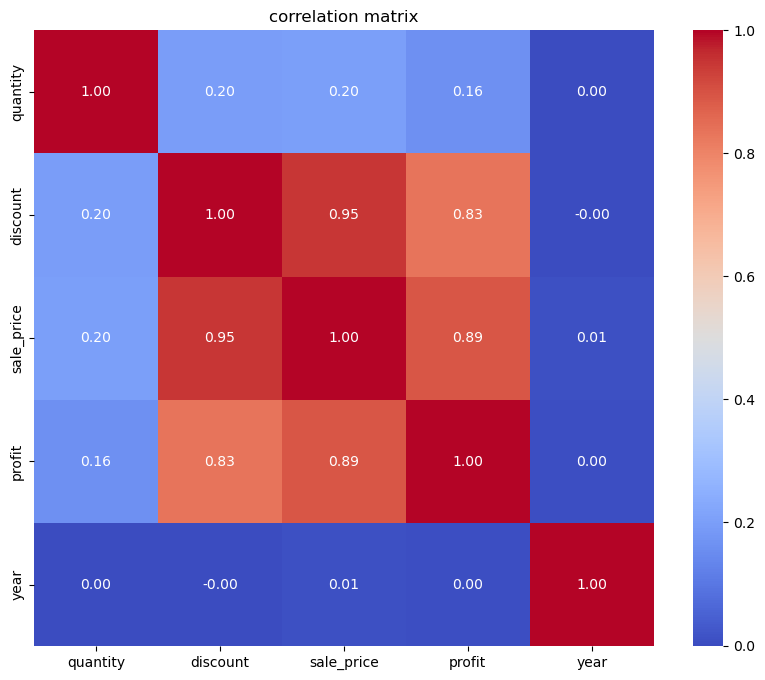

In [113]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix')
plt.show()